# Synthetic data test: Different structural indices

In this test, we'll create data from different sources and try running the inversion on each source with different SI values. We'll plot the estimated depths and the weights RMSE to see if there is a difference in data misfit when using the wrong SI value.

In [1]:
from pathlib import Path
import numpy as np
from IPython.display import Image
import harmonica as hm
import verde as vd
import matplotlib.pyplot as plt
import xrft
import euler
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
region = [0, 35e3, 0, 25e3]
height = 1000
spacing = 300
coordinates = vd.grid_coordinates(region, spacing=spacing, extra_coords=height)
inclination, declination = 35, -20
base_level = 300
noise_level = 15
main_field = hm.magnetic_angles_to_vec(1, inclination, declination)
true_coordinates = (15e3, 10e3, 0e3)

Gather all data into a dictionary for later use. For each model, we'll generate a grid of total-field anomaly and the 3 spatial derivatives. Horizontal derivatives are calculated with finite-differences and the vertical derivated with FFT.

In [4]:
datasets = {}

### Dipole

Data from single dipole.

In [5]:
magnetic_field = hm.dipole_magnetic(
    coordinates,
    dipoles=true_coordinates,
    magnetic_moments=hm.magnetic_angles_to_vec(1e10, inclination, declination),
    field="b",
)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field)) + base_level
magnetic_anomaly += np.random.default_rng(42).normal(
    0, noise_level, size=magnetic_anomaly.shape
)

# Make a grid and calculate derivatives
# Can't have the height as a coordinate because of a problem with xrft
data = vd.make_xarray_grid(
    coordinates[:2], (magnetic_anomaly, coordinates[-1]), data_names=["field", "height"]
)
data["deriv_east"] = hm.derivative_easting(data.field)
data["deriv_north"] = hm.derivative_northing(data.field)
pad_width = {
    "easting": data.easting.size // 3,
    "northing": data.northing.size // 3,
}
padded = xrft.pad(data.field, pad_width, mode="linear_ramp", constant_values=None)
data["deriv_up"] = xrft.unpad(hm.derivative_upward(padded), pad_width)
# Add back the height
data = data.assign_coords(height=data.height)

datasets["dipole"] = data

### Pipe

A vertical pipe, approximated by a prism with very small dimensions and elongated in depth.

In [6]:
size = 50
magnetic_field = hm.prism_magnetic(
    coordinates,
    prisms=[
        true_coordinates[0] - size,
        true_coordinates[0] + size,
        true_coordinates[1] - size,
        true_coordinates[1] + size,
        true_coordinates[2] - 15e3,
        true_coordinates[2],
    ],
    magnetization=hm.magnetic_angles_to_vec(1500, inclination, declination),
    field="b",
)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field)) + base_level
magnetic_anomaly += np.random.default_rng(42).normal(
    0, noise_level, size=magnetic_anomaly.shape
)

# Make a grid and calculate derivatives
# Can't have the height as a coordinate because of a problem with xrft
data = vd.make_xarray_grid(
    coordinates[:2], (magnetic_anomaly, coordinates[-1]), data_names=["field", "height"]
)
data["deriv_east"] = hm.derivative_easting(data.field)
data["deriv_north"] = hm.derivative_northing(data.field)
pad_width = {
    "easting": data.easting.size // 3,
    "northing": data.northing.size // 3,
}
padded = xrft.pad(data.field, pad_width, mode="linear_ramp", constant_values=None)
data["deriv_up"] = xrft.unpad(hm.derivative_upward(padded), pad_width)
# Add back the height
data = data.assign_coords(height=data.height)

datasets["pipe"] = data

### Dike

A dike, approximated by a thin prism along the northing direction.

In [7]:
magnetic_field = hm.prism_magnetic(
    coordinates,
    prisms=[
        true_coordinates[0] - 100,
        true_coordinates[0] + 100,
        true_coordinates[1] - 50e3,
        true_coordinates[1] + 50e3,
        true_coordinates[2] - 7e3,
        true_coordinates[2],
    ],
    magnetization=hm.magnetic_angles_to_vec(40, inclination, declination),
    field="b",
)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field)) + base_level
magnetic_anomaly += np.random.default_rng(42).normal(
    0, noise_level, size=magnetic_anomaly.shape
)

# Make a grid and calculate derivatives
# Can't have the height as a coordinate because of a problem with xrft
data = vd.make_xarray_grid(
    coordinates[:2], (magnetic_anomaly, coordinates[-1]), data_names=["field", "height"]
)
data["deriv_east"] = hm.derivative_easting(data.field)
data["deriv_north"] = hm.derivative_northing(data.field)
pad_width = {
    "easting": data.easting.size // 3,
    "northing": data.northing.size // 3,
}
padded = xrft.pad(data.field, pad_width, mode="linear_ramp", constant_values=None)
data["deriv_up"] = xrft.unpad(hm.derivative_upward(padded), pad_width)
# Add back the height
data = data.assign_coords(height=data.height)

datasets["dike"] = data

### Line

A thin horizontal line that terminates in the center of the image.

In [8]:
magnetic_field = hm.prism_magnetic(
    coordinates,
    prisms=[
        true_coordinates[0] - 50,
        true_coordinates[0] + 50,
        true_coordinates[1] - 50e3,
        true_coordinates[1],
        true_coordinates[2] - 50,
        true_coordinates[2] + 50,
    ],
    magnetization=hm.magnetic_angles_to_vec(1000, inclination, declination),
    field="b",
)
magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field)) + base_level
magnetic_anomaly += np.random.default_rng(42).normal(
    0, noise_level, size=magnetic_anomaly.shape
)

# Make a grid and calculate derivatives
# Can't have the height as a coordinate because of a problem with xrft
data = vd.make_xarray_grid(
    coordinates[:2], (magnetic_anomaly, coordinates[-1]), data_names=["field", "height"]
)
data["deriv_east"] = hm.derivative_easting(data.field)
data["deriv_north"] = hm.derivative_northing(data.field)
pad_width = {
    "easting": data.easting.size // 3,
    "northing": data.northing.size // 3,
}
padded = xrft.pad(data.field, pad_width, mode="linear_ramp", constant_values=None)
data["deriv_up"] = xrft.unpad(hm.derivative_upward(padded), pad_width)
# Add back the height
data = data.assign_coords(height=data.height)

datasets["line"] = data

## Plot the data

Make a maps of the data generated for visual inspection.

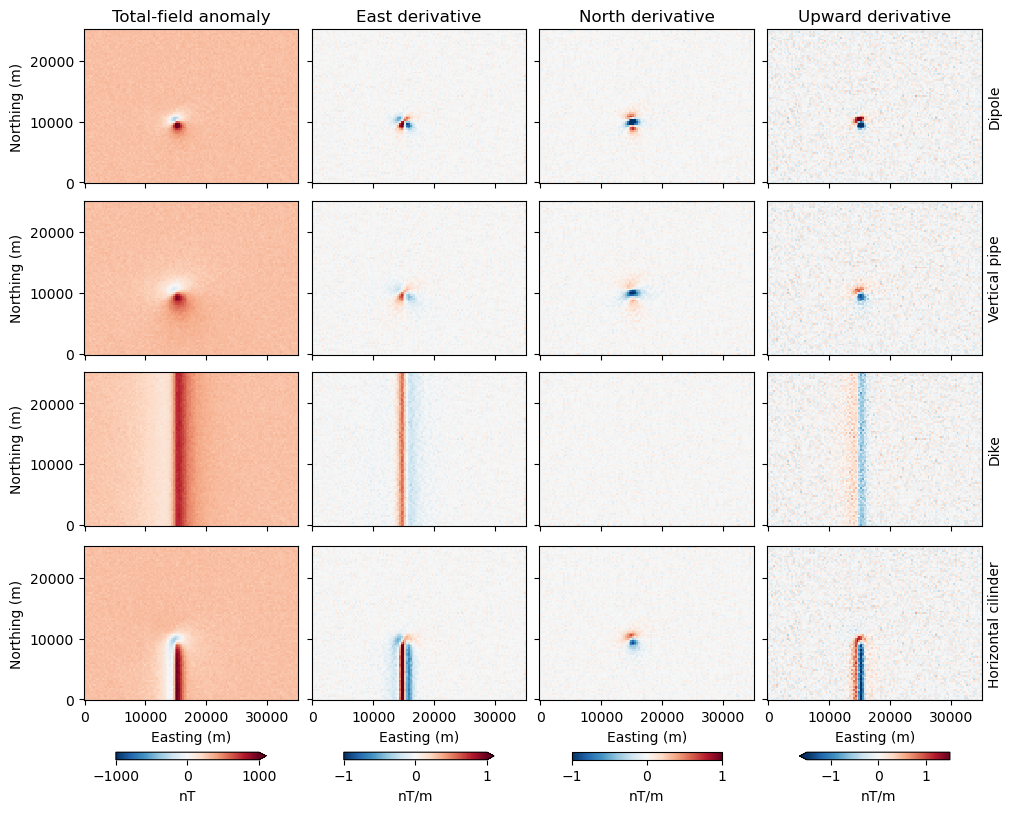

In [9]:
model_names = {
    "dipole": "Dipole",
    "line": "Horizontal cilinder",
    "pipe": "Vertical pipe",
    "dike": "Dike",
}
units = {"field": "nT", "deriv_east": "nT/m", "deriv_north": "nT/m", "deriv_up": "nT/m"}
scale = {"field": 1000, "deriv_east": 1, "deriv_north": 1, "deriv_up": 1.5}
titles = {
    "field": "Total-field anomaly",
    "deriv_east": "East derivative",
    "deriv_north": "North derivative",
    "deriv_up": "Upward derivative",
}

fig, axes = plt.subplots(
    4, 4, figsize=(10, 8), layout="constrained", sharex=True, sharey=True
)
for i, model in enumerate(datasets):
    for field, ax in zip(titles, axes[i, :].ravel()):
        if i == axes.shape[0] - 1:
            kwargs = dict(
                add_colorbar=True,
                cbar_kwargs=dict(
                    orientation="horizontal", aspect=20, shrink=0.7, label=units[field]
                ),
            )
        else:
            kwargs = dict(add_colorbar=False)
        datasets[model][field].plot.pcolormesh(
            ax=ax,
            add_labels=False,
            cmap="RdBu_r",
            vmin=-scale[field],
            vmax=scale[field],
            **kwargs
        )
        ax.set_aspect("equal")
for ax in axes[:, 0]:
    ax.set_ylabel("Northing (m)")
for ax in axes[-1, :]:
    ax.set_xlabel("Easting (m)")
for ax, model in zip(axes[:, -1], datasets):
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(model_names[model])
for ax, field in zip(axes[0, :], titles):
    ax.set_title(titles[field])
plt.show()

## Run the Euler Inversion

Now we can run the Euler inversion on all 4 datasets. For each model, we'll the inversion 3 times varying the SI value. We'll report the estimated position (true z coordinate is 0 m) and the weighted RMSE.

In [10]:
structural_indices = [1, 2, 3]
rmse = {}
solutions = {}
for model in ["dipole", "line", "pipe", "dike"]:
    print(f"{model.capitalize()}:")
    data = datasets[model]
    rmse[model] = []
    solutions[model] = []
    for si in structural_indices:
        ei = euler.EulerInversion(structural_index=si).fit_grid(data)
        solutions[model].append(ei)
        rmse[model].append(ei.data_misfit_[-1])
        print(f"  SI={si} | RMSE={rmse[model][-1]} | Position={ei.location_}")

Dipole:
  SI=1 | RMSE=0.4147927548075445 | Position=[15009.1684842  10033.09135763   644.09861863]
  SI=2 | RMSE=0.3730768841292434 | Position=[14998.29629829 10005.34019172   339.47277247]
  SI=3 | RMSE=0.365648509609339 | Position=[ 1.49980513e+04  9.99390378e+03 -2.14583810e+00]
Line:
  SI=1 | RMSE=0.3825091449570515 | Position=[15033.58648709 10054.55233011   461.98420652]
  SI=2 | RMSE=0.3694285008766698 | Position=[15000.17716381  9972.46411185    33.81515658]


  SI=3 | RMSE=0.37192863356762157 | Position=[14998.97121915  9957.1347944   -435.45458086]
Pipe:
  SI=1 | RMSE=0.38075235679189273 | Position=[14994.31086324 10013.46236574   518.2146539 ]
  SI=2 | RMSE=0.3691206015585733 | Position=[14994.41178587  9984.81103447    74.54280297]
  SI=3 | RMSE=0.37036878147340635 | Position=[14993.10125893  9974.78223537  -431.41019396]
Dike:
  SI=1 | RMSE=0.3761178594396036 | Position=[15009.21365317 12562.9178217    176.20616145]
  SI=2 | RMSE=0.38281430313504955 | Position=[15006.47437569 12591.83801116  -543.74508234]


  SI=3 | RMSE=0.3958053893510001 | Position=[15001.21354716 12612.31066982 -1326.81316429]


Seems like there is a pattern: 

1. z correlates with SI just like Euler deconvolution
2. RMSE is smallest for the correct SI

## Make a figure for the paper

Now we can make a figure for the paper that summarizes these results.

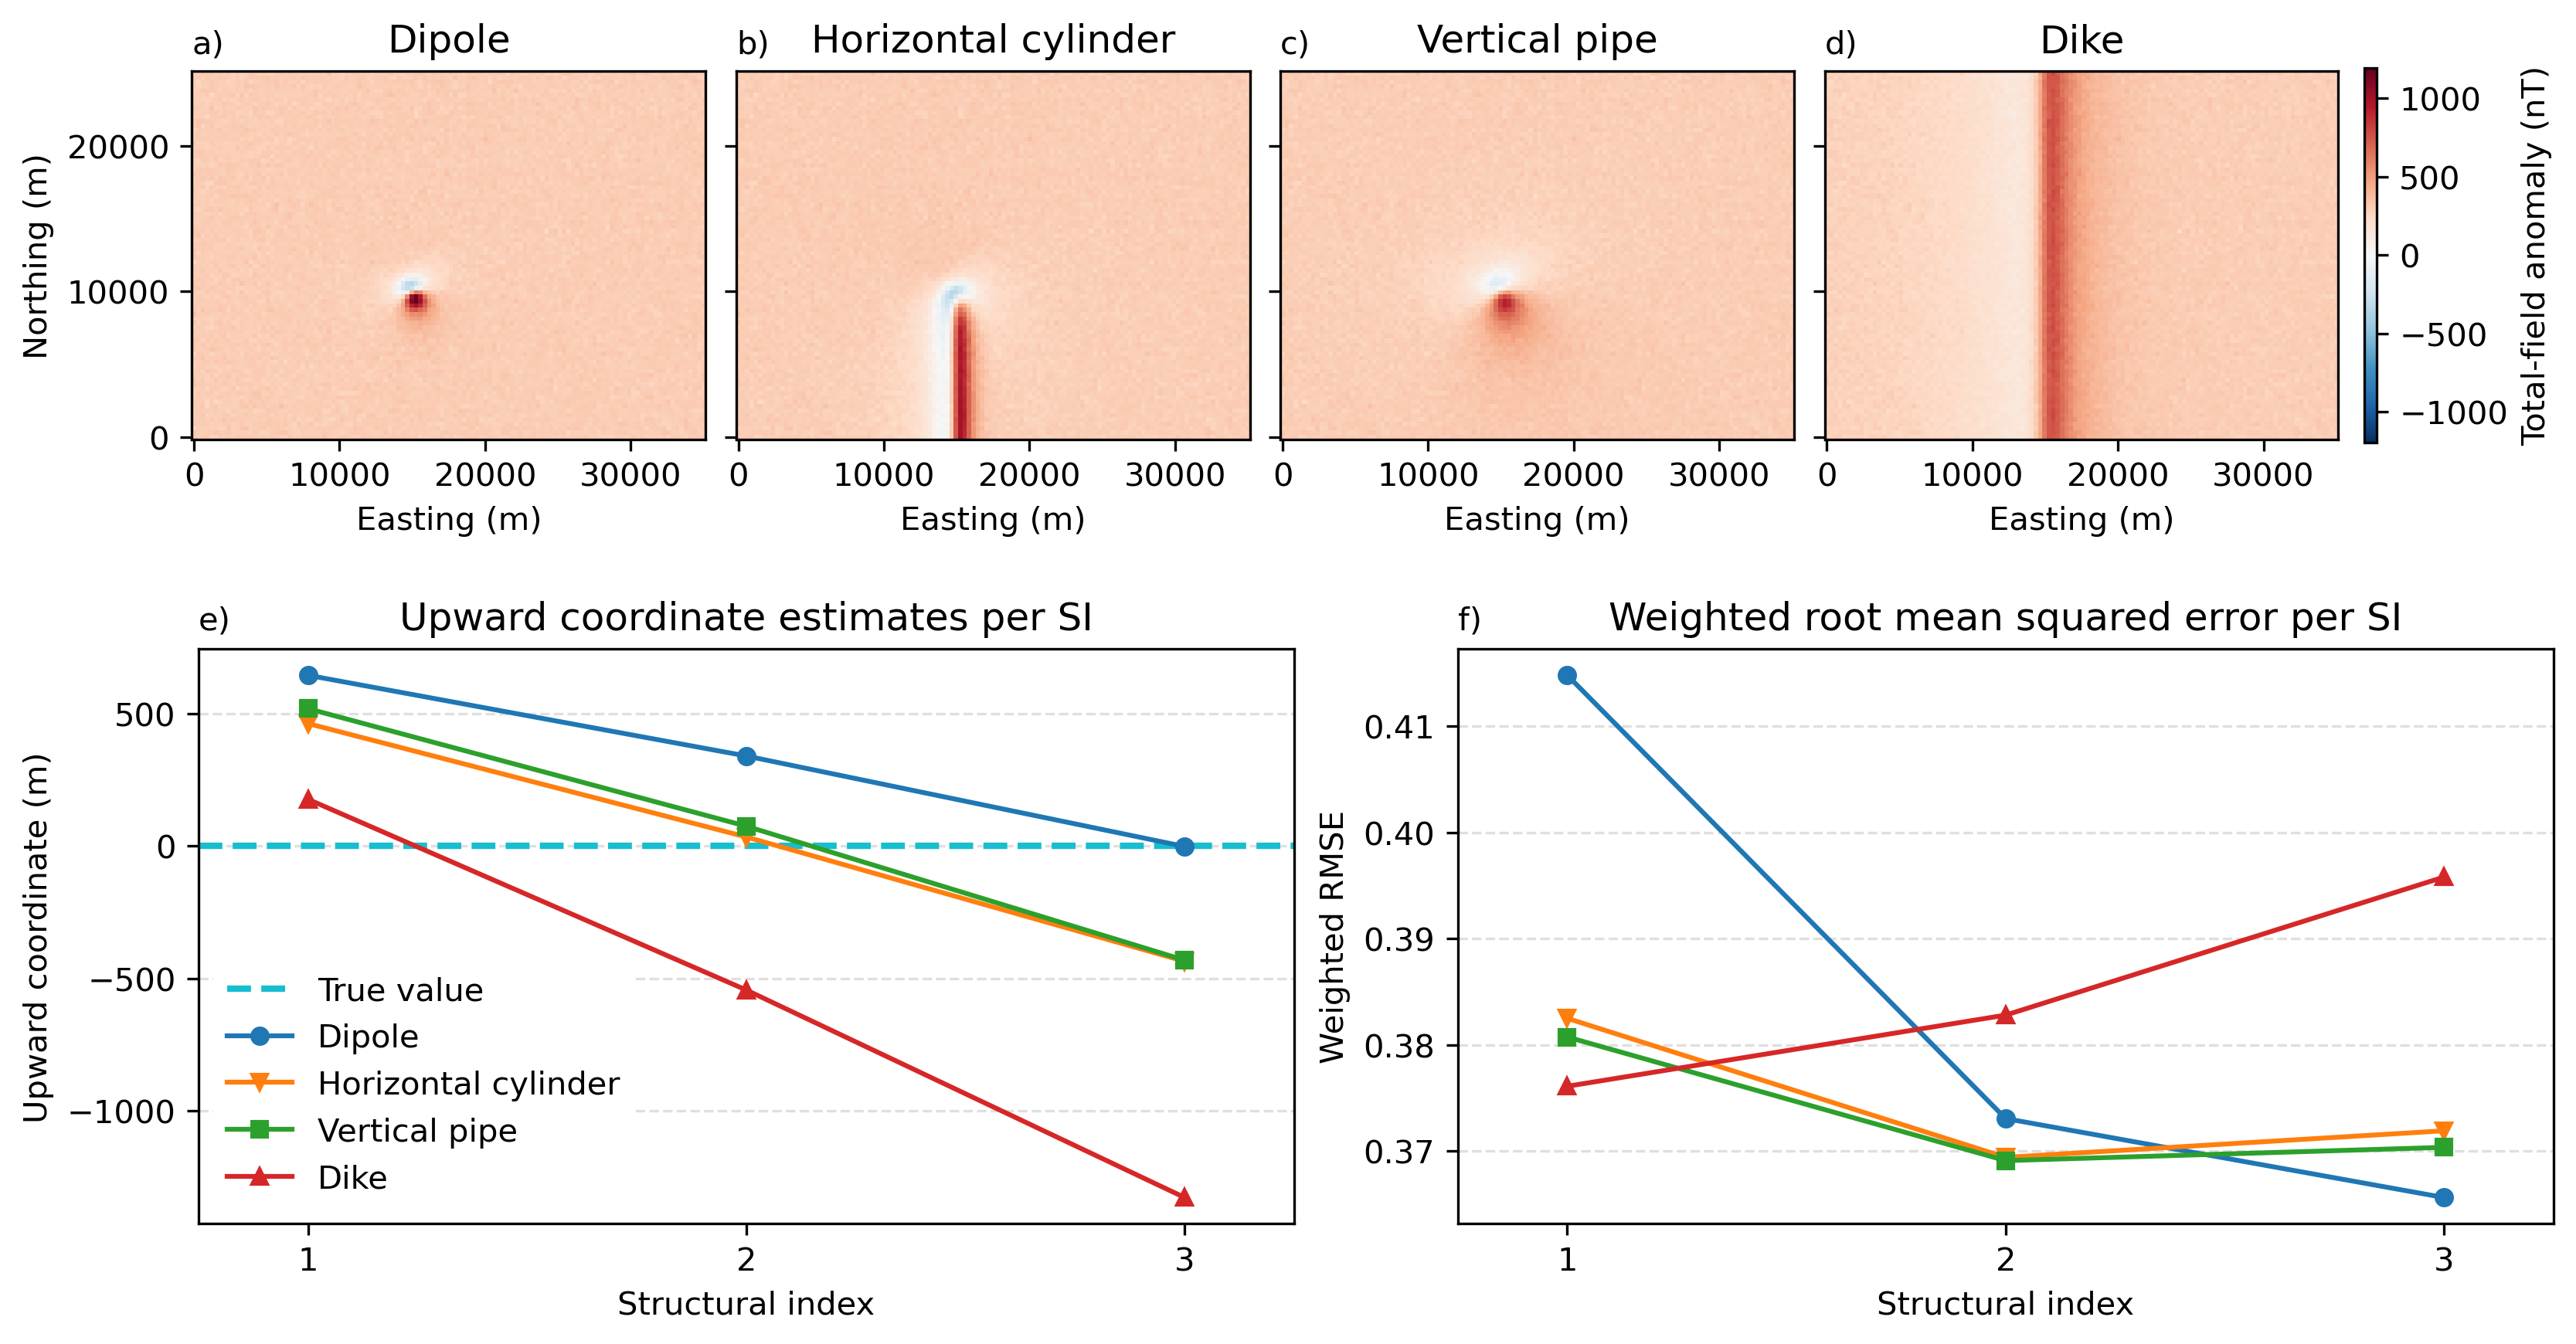

In [11]:
fig = plt.figure(figsize=(11, 5.6), layout="constrained")
figures = fig.subfigures(2, 1, height_ratios=(1, 1.5), hspace=0.1)

axes = figures[0].subplots(1, 4, sharey=True)
model_names = {
    "dipole": "Dipole",
    "line": "Horizontal cylinder",
    "pipe": "Vertical pipe",
    "dike": "Dike",
}
scale = vd.maxabs([datasets[model].field.values for model in datasets])
for ax, model, label in zip(axes, model_names, "abcd"):
    ax.set_aspect("equal")
    tmp = datasets[model].field.plot.pcolormesh(
        ax=ax,
        add_labels=False,
        add_colorbar=False,
        cmap="RdBu_r",
        vmin=-scale,
        vmax=scale,
    )
    ax.set_title(model_names[model])
    ax.set_xlabel("Easting (m)")
    ax.text(0, 1.05, f"{label})", transform=ax.transAxes)
figures[0].colorbar(tmp, ax=axes[-1], aspect=30, label="Total-field anomaly (nT)")
axes[0].set_ylabel("Northing (m)")

colors = list(plt.rcParams["axes.prop_cycle"].by_key()["color"])
markers = ["o", "v", "s", "^"]

xlim = 0.75, 3.25

axes = figures[1].subplots(1, 2)
ax = axes[0]
ax.hlines(
    0, *xlim, colors=colors[-1], linestyles="--", linewidths=2, label="True value"
)
for model, color, marker in zip(solutions, colors, markers):
    z = [ei.location_[-1] for ei in solutions[model]]
    ax.plot(
        structural_indices,
        z,
        color=color,
        marker=marker,
        label=model_names[model],
        markersize=5,
    )
ax.set_xlabel("Structural index")
ax.set_xlim(*xlim)
ax.set_xticks([1, 2, 3])
ax.set_ylabel("Upward coordinate (m)")
ax.set_title("Upward coordinate estimates per SI")
ax.legend(
    loc="lower left",
    framealpha=1,
    facecolor="#ffffff",
    edgecolor="#ffffff",
)
ax.text(0, 1.035, "e)", transform=ax.transAxes)
ax.grid(axis="y", alpha=0.4, linestyle="--")

ax = axes[1]
for model, color, marker in zip(rmse, colors, markers):
    ax.plot(
        structural_indices,
        rmse[model],
        color=color,
        marker=marker,
        label=model_names[model],
        markersize=5,
    )
ax.set_xlabel("Structural index")
ax.set_xlim(0.75, 3.25)
ax.set_xticks([1, 2, 3])
ax.set_ylabel("Weighted RMSE")
ax.set_title("Weighted root mean squared error per SI")
ax.text(0, 1.035, "f)", transform=ax.transAxes)
ax.grid(axis="y", alpha=0.4, linestyle="--")

# Save the figure and display the saved figure because savefig and
# show can sometimes create slightly different figures
figfile = Path("..") / "paper" / "figures" / "synthetic-structural-index.png"
fig.savefig(figfile, dpi=300, bbox_inches="tight")
plt.close()
Image(figfile)

## Export a LaTeX file with information for the manuscript

Save things we want to include on the paper so that they can be referenced instead of copied.

In [12]:
output = rf"""
\newcommand{{\SynSITrueEast}}{{\qty{{{true_coordinates[0]:.0f}}}{{\m}}}}
\newcommand{{\SynSITrueNorth}}{{\qty{{{true_coordinates[1]:.0f}}}{{\m}}}}
\newcommand{{\SynSITrueUp}}{{\qty{{{true_coordinates[2]:.0f}}}{{\m}}}}
\newcommand{{\SynSITrueBase}}{{\qty{{{base_level:.0f}}}{{\nano\tesla}}}}
\newcommand{{\SynSIDec}}{{\qty{{{declination:.0f}}}{{\degree}}}}
\newcommand{{\SynSIInc}}{{\qty{{{inclination:.0f}}}{{\degree}}}}
\newcommand{{\SynSINoise}}{{\qty{{{noise_level:.0f}}}{{\nano\tesla}}}}
\newcommand{{\SynSIHeight}}{{\qty{{{height:.0f}}}{{\m}}}}
\newcommand{{\SynSISpacing}}{{\qty{{{spacing:.0f}}}{{\m}}}}
""".strip()
path = Path("..") / "paper" / "variables" / "synthetic-structural-index.tex"
path.write_text(output)
print(output)

\newcommand{\SynSITrueEast}{\qty{15000}{\m}}
\newcommand{\SynSITrueNorth}{\qty{10000}{\m}}
\newcommand{\SynSITrueUp}{\qty{0}{\m}}
\newcommand{\SynSITrueBase}{\qty{300}{\nano\tesla}}
\newcommand{\SynSIDec}{\qty{-20}{\degree}}
\newcommand{\SynSIInc}{\qty{35}{\degree}}
\newcommand{\SynSINoise}{\qty{15}{\nano\tesla}}
\newcommand{\SynSIHeight}{\qty{1000}{\m}}
\newcommand{\SynSISpacing}{\qty{300}{\m}}
